## Get the 5-minute and 15-minute data

You can use the `APPL_5min_60days.csv` file directly. It includes the 5-minute and 15-minute prices and volumes between 2024-11-25 and 2025-02-24. 

In [1]:
# import yfinance as yf
# data_5 = yf.download("AAPL", interval="5m", period="60d") 
# data_15 = yf.download("AAPL", interval="15m", period="60d")
# data_5.to_csv("AAPL_5min_60days.csv")
# data_15.to_csv("AAPL_15min_60days.csv")

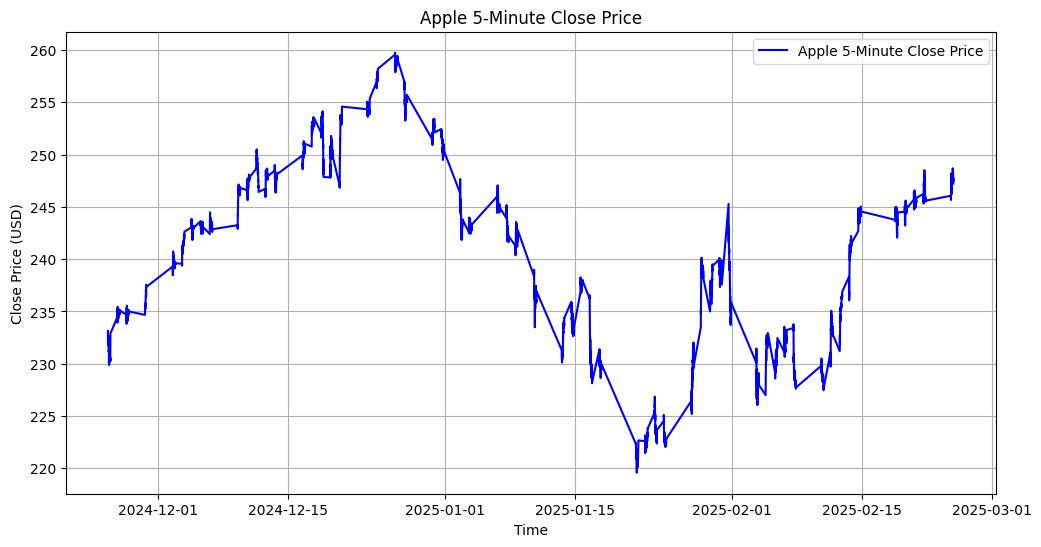

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("AAPL_5min_60days.csv")
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

# time plot

# Time plot of Apple's daily close price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Apple 5-Minute Close Price', color='blue')
plt.title('Apple 5-Minute Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

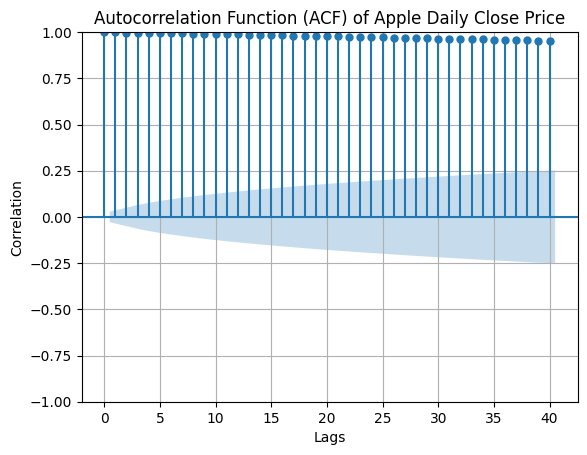

In [2]:
# ACF
from statsmodels.graphics.tsaplots import plot_acf

# ACF plot
plt.figure(figsize=(12, 6))
plot_acf(data['Close'], lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF) of Apple Daily Close Price')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

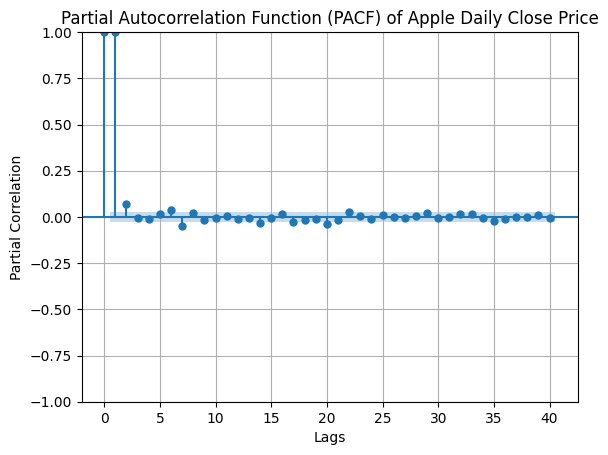

In [3]:
# PACF
from statsmodels.graphics.tsaplots import plot_pacf

# PACF plot
plt.figure(figsize=(12, 6))
plot_pacf(data['Close'], lags=40, alpha=0.05, method='ols')
plt.title('Partial Autocorrelation Function (PACF) of Apple Daily Close Price')
plt.xlabel('Lags')
plt.ylabel('Partial Correlation')
plt.grid()
plt.show()

## ETS Model

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


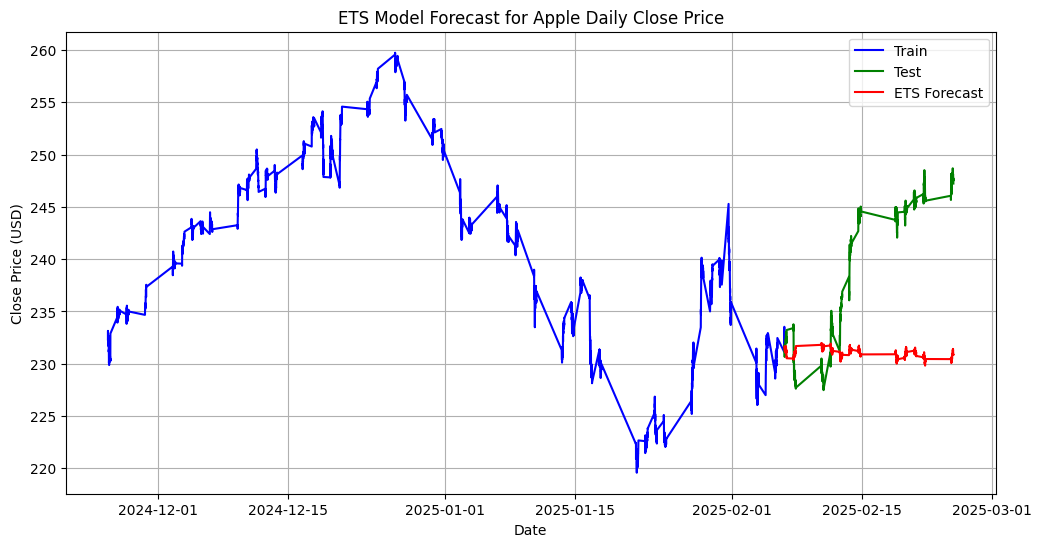

In [4]:
# Split data into train and test sets
train_size = int(len(data['Close']) * 0.8)
train, test = data['Close'][:train_size], data['Close'][train_size:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit ETS model
ets_model = ExponentialSmoothing(
    train,
    trend="add",  # Additive trend
    seasonal="add",  # Additive seasonality (if applicable)
    seasonal_periods=252,  # Assuming yearly seasonality (252 trading days)
).fit()

# Forecast on test data
ets_forecast = ets_model.forecast(len(test))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, ets_forecast, label='ETS Forecast', color='red')
plt.title('ETS Model Forecast for Apple Daily Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

## ARIMA

In [5]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity
adf_result = adfuller(train)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
 

ADF Statistic: -1.2521886060092502
p-value: 0.6507526079281308


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4285.522, Time=1.91 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4307.133, Time=0.27 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4291.153, Time=0.67 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4290.983, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4305.134, Time=0.11 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4294.946, Time=0.34 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4294.272, Time=1.06 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4283.466, Time=2.44 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4294.489, Time=0.83 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=4284.303, Time=3.24 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4284.805, Time=2.42 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4283.321, Time=3.19 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4294.971, Time=1.55 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=4282.489, Time=2.27 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=4294.123, Time=1.41 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=4281.902, Time=3.49 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=4284.319, Time=3.73 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=4282.371, Time=5.24 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=4280.392, Time=3.39 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=4283.952, Time=1.52 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(0,0,0)[0]             : AIC=4278.393, Time=1.51 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,5)(0,0,0)[0]             : AIC=4281.953, Time=0.69 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0]             : AIC=4280.490, Time=1.12 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,5)(0,0,0)[0]             : AIC=4280.372, Time=1.98 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0]             : AIC=4292.124, Time=0.65 sec


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0]             : AIC=4279.904, Time=2.20 sec

Best model:  ARIMA(2,1,5)(0,0,0)[0]          
Total fit time: 47.594 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3686
Model:               SARIMAX(2, 1, 5)   Log Likelihood               -2131.197
Date:                Mon, 03 Mar 2025   AIC                           4278.393
Time:                        16:54:57   BIC                           4328.090
Sample:                             0   HQIC                          4296.083
                               - 3686                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1020      0.149     -7.395      0.000      -1.394

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


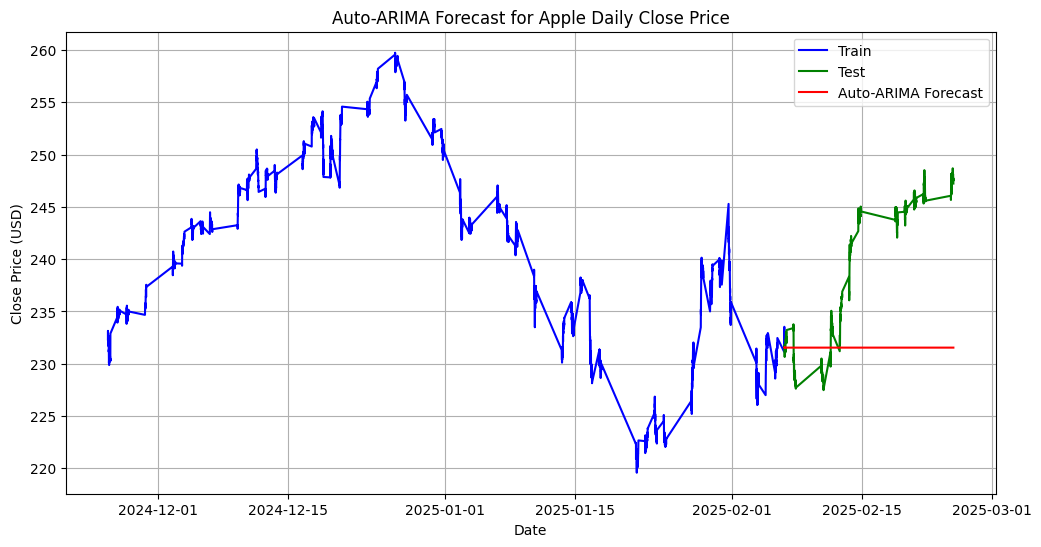

In [6]:
from pmdarima import auto_arima
import numpy as np

# Auto-ARIMA to find the best parameters
auto_model = auto_arima(train, seasonal=False, trace=True)
print(auto_model.summary())

# Forecast using the best model
auto_forecast = auto_model.predict(n_periods=len(test))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, auto_forecast, label='Auto-ARIMA Forecast', color='red')
plt.title('Auto-ARIMA Forecast for Apple Daily Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# ARIMA(3,1,4)(0,0,0)[0]             : AIC=4279.904, Time=2.20 sec
# 
# Best model:  ARIMA(2,1,5)(0,0,0)[0]
# Total fit time: 47.594 seconds
# SARIMAX Results
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                 3686
# Model:               SARIMAX(2, 1, 5)   Log Likelihood               -2131.197
# Date:                Mon, 03 Mar 2025   AIC                           4278.393
# Time:                        16:54:57   BIC                           4328.090
# Sample:                             0   HQIC                          4296.083
# - 3686
# Covariance Type:                  opg
# ==============================================================================
# coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1         -1.1020      0.149     -7.395      0.000      -1.394      -0.810
# ar.L2         -0.5423      0.138     -3.941      0.000      -0.812      -0.273
# ma.L1          1.0354      0.149      6.939      0.000       0.743       1.328
# ma.L2          0.4664      0.130      3.580      0.000       0.211       0.722
# ma.L3         -0.0164      0.017     -0.992      0.321      -0.049       0.016
# ma.L4          0.0064      0.017      0.371      0.711      -0.027       0.040
# ma.L5         -0.0449      0.015     -2.951      0.003      -0.075      -0.015
# sigma2         0.1862      0.001    252.809      0.000       0.185       0.188
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1079476.57
# Prob(Q):                              1.00   Prob(JB):                         0.00
# Heteroskedasticity (H):               4.74   Skew:                            -1.75
# Prob(H) (two-sided):                  0.00   Kurtosis:                        86.77
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).

## Analyze Intraday Patterns

1. Opening Gaps on 15-Minute Data
2. Midday Reversals on 15-Minute Data

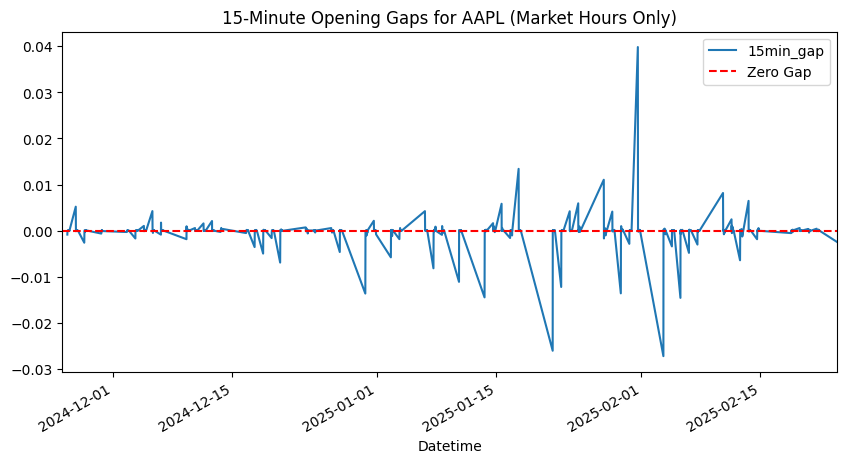

In [2]:
# Opening Gaps on 15-Minute Data
data['15min_gap'] = (data['Open'] - data['Close'].shift(1)) / data['Close'].shift(1)

# Plot the 15-minute gaps
data['15min_gap'].plot(figsize=(10, 5), title='15-Minute Opening Gaps for AAPL (Market Hours Only)')
plt.xlim(pd.to_datetime('2024-11-25'), pd.to_datetime('2025-02-24'))
plt.axhline(0, color='red', linestyle='--', label='Zero Gap')
plt.legend()
plt.show()

In [3]:
# Function to detect mid-15-minute reversals
def detect_mid_15min_reversal(row, threshold=0.01):
    """
    Detects a mid-15-minute reversal based on Open, High, Low, and Close prices.
    :param row: A row of the DataFrame containing Open, High, Low, and Close prices.
    :param threshold: Minimum price change (in percentage) to qualify as a reversal.
    :return: True if a reversal is detected, False otherwise.
    """
    # Calculate price changes
    high_to_low = (row['High'] - row['Low']) / row['Open'] # Percentage change from high to low
    open_to_high = (row['High'] - row['Open']) / row['Open']   # Percentage change from open to high
    open_to_low = (row['Low'] - row['Open']) / row['Open']   # Percentage change from open to low

    # Check for reversal
    if abs(high_to_low) >= threshold:  # Ensure the price movement is significant
        if open_to_high > 0 > open_to_low:  # Price rose and then fell
            return True
        elif open_to_high < 0 < open_to_low:  # Price fell and then rose
            return True
    return False

# Apply the function to each row
data['Mid_15min_Reversal'] = data.apply(detect_mid_15min_reversal, axis=1)

# Count the number of reversals
reversal_count = data['Mid_15min_Reversal'].sum()
print(f"Total mid-15-minute reversals detected: {reversal_count}")
print(data.loc[data['Mid_15min_Reversal'] == True])

Total mid-15-minute reversals detected: 23
                                Close        High         Low        Open  \
Datetime                                                                    
2024-11-25 20:45:00+00:00  232.880005  233.169998  229.845001  230.354996   
2024-12-02 14:30:00+00:00  238.460007  239.600006  237.160004  237.270004   
2024-12-17 14:30:00+00:00  252.779999  252.860397  249.789993  250.134995   
2024-12-27 14:30:00+00:00  256.440002  258.700012  256.109985  257.899994   
2025-01-02 14:30:00+00:00  245.195999  249.100006  244.800003  248.929993   
2025-01-13 14:30:00+00:00  231.169998  233.589996  230.199997  233.500000   
2025-01-15 14:30:00+00:00  237.350006  237.520004  234.429993  234.639999   
2025-01-17 14:30:00+00:00  229.889008  232.289993  229.720001  231.309998   
2025-01-21 14:30:00+00:00  220.899994  224.419998  220.800003  224.000000   
2025-01-22 14:30:00+00:00  221.447998  223.089996  219.800003  219.940002   
2025-01-27 14:30:00+00:00  226.72